## CIS 4567
## Dr Mohammed Salehan
## Sergio Figueroa and Roman Lewis

# Milestone 2: Data Preprocessing

## Objective

The object of this project is to anticipate any sudden increase of the included anxiety, social phobia, and life satisfaction (GAD-7, SPIN, SWL, and SINS) scores in relation to how much someone games – this will be done by a linear regression predictive model. However, before we can start modeling, we will have to clean up a lot of repetitive and nonessential data from our dataset. The included timestamp of when the survey was started will not prove useful in our analysis, along with the individual responses of each question in the personality tests given – seven questions in the GAD-7, five in SWL, and seventeen in SPIN. Columns for game, platform, league, highestleague, reference, and accept (of terms) will also be dropped; these specific variables are extremely skewed due to how and where the data was collected (in a league of legends subreddit). This, however, does not discredit our dataset in anyway as this subreddit is known to be one of the largest gatherings in the gaming community. 

## Variable Descriptions

1) All 13,464 participants provided information about their Demographics including
Age, Gender, and country of birth / residence.

2) Workplace – Are these participations working, unemployment, a student, a student
and employed (Qualitative)

3) Degree – Are they graduated with a degree if so, this could include high school,
bachelors, masters, PHD (Qualitative)

4) Playstyle – This would be the participant’s preference of game: Multiplayer, Single
player, Multiplayer-Online with Strangers, or Multiplayer with Friends (Qualitative)

5) Why Play – This would describe why these participants choose to game, for fun, to
improve, to win. (Qualitative)

6) Hours played – How often these participants spend on gaming a day, per week
(Quantitative)

7) GAD-7 (The Generalized Anxiety Disorder) – Was used to measure generalized
anxiety rated on a 5-point scale comprised of seven items with the result being out of
0(no anxiety) to 21(severe anxiety).

8) SWLS (The Life Satisfaction with Life Scale) – Participants responded on the
7-point scale to 5 items indicating their agreement from “strongly disagree” to “strongly
agree” The scale was designed to investigate subjective experience of well-being
without respect to specific life domains such as health or employment status.

9) SPIN (Social anxiety) – These results are formed by a 17-item questionnaire. This
variable measured specific symptoms such as (fear, avoidance, and physiologic
arousal)
This is measured on a 5-point scale:0(“Not at all”) , 1(“A little bit”), 2 (“Somewhat”), 3
(“Very much”) or 4 (“Extremely”). These scores are summed up. The scores are then
interpreted as degree of social anxiety as follows: none (less than 20 points), mild
(21-30 points), moderate (31-40 points), severe (41-50 points) and very severe (51 or
more points)

10) Narcissism – Measured by the Single Item Narcissism Scale that has reasonable
reliability, is significantly correlated with longer narcissism scales, and uncorrelated with
self-esteem.

11) GADE - Affect of gaming at work

12) Streams - How many times they have streamed in a week

In [ ]:
%%local
#lets start by installing visualization libraries
!emr/notebook-env/bin/pip install matplotlib

#restart the kernel. You can continue to the next cell after kernel is restarted.
import os
os._exit(0)

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.2 MB 15.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 44.8 MB/s eta 0:00:01
     |████████████████████████████████| 880 kB 37.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 40.5 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## Load Data

In [1]:
# Make sure pyspark is working
import pyspark
sc.version

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1638350219052_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'2.4.5-amzn-0'

In [2]:
# Let's load GamingStudy data set as an rdd
gaming = (
    sc
    .textFile('s3://cis4670-sergiofigueroa/Spark/GamingStudy_data2.csv') 
    .map(lambda element: element.split(","))
)
gaming.take(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[['S. No.', 'GADE', 'Hours', 'earnings', 'whyplay', 'streams', 'Narcissism', 'Gender', 'Age', 'Work', 'Degree', 'Birthplace', 'Residence', 'Playstyle', 'GAD_T', 'SWL_T', 'SPIN_T', 'Residence_ISO3', 'Birthplace_ISO3'], ['1', 'Not difficult at all', '15', 'I play for fun', 'having fun', '0', '1', 'Male', '25', 'Unemployed / between jobs', 'Bachelor�(or equivalent)', 'USA', 'USA', 'Singleplayer', '1', '23', '5', 'USA', 'USA'], ['2', 'Somewhat difficult', '8', 'I play for fun', 'having fun', '2', '1', 'Male', '41', 'Unemployed / between jobs', 'Bachelor�(or equivalent)', 'USA', 'USA', 'Multiplayer - online - with strangers', '8', '16', '33', 'USA', 'USA'], ['3', 'Not difficult at all', '0', 'I play for fun', 'having fun', '0', '4', 'Female', '32', 'Employed', 'Bachelor�(or equivalent)', 'Germany', 'Germany', 'Singleplayer', '8', '17', '31', 'DEU', 'DEU'], ['4', 'Not difficult at all', '20', 'I play for fun', 'improving', '5', '2', 'Male', '28', 'Employed', 'Bachelor�(or equivalent)', 'USA'

In [3]:
# Remove header of rdd
gaming = (
gaming
.zipWithIndex()
.filter(lambda row: row[1] > 0)
.map(lambda row: row[0])
)
gaming.take(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[['1', 'Not difficult at all', '15', 'I play for fun', 'having fun', '0', '1', 'Male', '25', 'Unemployed / between jobs', 'Bachelor�(or equivalent)', 'USA', 'USA', 'Singleplayer', '1', '23', '5', 'USA', 'USA'], ['2', 'Somewhat difficult', '8', 'I play for fun', 'having fun', '2', '1', 'Male', '41', 'Unemployed / between jobs', 'Bachelor�(or equivalent)', 'USA', 'USA', 'Multiplayer - online - with strangers', '8', '16', '33', 'USA', 'USA'], ['3', 'Not difficult at all', '0', 'I play for fun', 'having fun', '0', '4', 'Female', '32', 'Employed', 'Bachelor�(or equivalent)', 'Germany', 'Germany', 'Singleplayer', '8', '17', '31', 'DEU', 'DEU'], ['4', 'Not difficult at all', '20', 'I play for fun', 'improving', '5', '2', 'Male', '28', 'Employed', 'Bachelor�(or equivalent)', 'USA', 'USA', 'Multiplayer - online - with online acquaintances or teammates', '0', '17', '11', 'USA', 'USA'], ['5', 'Very difficult', '20', 'I play for fun', 'having fun', '1', '1', 'Male', '19', 'Employed', 'High school 

In [4]:
# We will now read our csv and convert it into a dataframe for preprocessing
gaming_df1 = spark.read.options(header='True',inferSchema='True',delimiter=',',nullValue='NA').csv("s3://cis4670-sergiofigueroa/Spark/GamingStudy_data2.csv")
gaming_df1.show(3)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------+--------------------+-----+--------------+----------+-------+----------+------+---+--------------------+--------------------+----------+---------+--------------------+-----+-----+------+--------------+---------------+
|S. No.|                GADE|Hours|      earnings|   whyplay|streams|Narcissism|Gender|Age|                Work|              Degree|Birthplace|Residence|           Playstyle|GAD_T|SWL_T|SPIN_T|Residence_ISO3|Birthplace_ISO3|
+------+--------------------+-----+--------------+----------+-------+----------+------+---+--------------------+--------------------+----------+---------+--------------------+-----+-----+------+--------------+---------------+
|     1|Not difficult at all|   15|I play for fun|having fun|      0|         1|  Male| 25|Unemployed / betw...|Bachelor�(or equi...|       USA|      USA|        Singleplayer|    1|   23|     5|           USA|            USA|
|     2|  Somewhat difficult|    8|I play for fun|having fun|      2|         1|  Male| 41|Unemp

In [5]:
# Change S. No. column to Id
gaming_df = gaming_df1.withColumnRenamed("S. No.","Id")
gaming_df.show(3)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+--------------------+-----+--------------+----------+-------+----------+------+---+--------------------+--------------------+----------+---------+--------------------+-----+-----+------+--------------+---------------+
| Id|                GADE|Hours|      earnings|   whyplay|streams|Narcissism|Gender|Age|                Work|              Degree|Birthplace|Residence|           Playstyle|GAD_T|SWL_T|SPIN_T|Residence_ISO3|Birthplace_ISO3|
+---+--------------------+-----+--------------+----------+-------+----------+------+---+--------------------+--------------------+----------+---------+--------------------+-----+-----+------+--------------+---------------+
|  1|Not difficult at all|   15|I play for fun|having fun|      0|         1|  Male| 25|Unemployed / betw...|Bachelor�(or equi...|       USA|      USA|        Singleplayer|    1|   23|     5|           USA|            USA|
|  2|  Somewhat difficult|    8|I play for fun|having fun|      2|         1|  Male| 41|Unemployed / betw...

For clarity purposes, we have renamed the S. No. column to Id. Our output shows that this was done successfully.

In [6]:
# Drop residence and birthplace (repetitive columns)
gaming_df = gaming_df.drop("Residence_ISO3", "Birthplace_ISO3")
gaming_df.show(3)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+--------------------+-----+--------------+----------+-------+----------+------+---+--------------------+--------------------+----------+---------+--------------------+-----+-----+------+
| Id|                GADE|Hours|      earnings|   whyplay|streams|Narcissism|Gender|Age|                Work|              Degree|Birthplace|Residence|           Playstyle|GAD_T|SWL_T|SPIN_T|
+---+--------------------+-----+--------------+----------+-------+----------+------+---+--------------------+--------------------+----------+---------+--------------------+-----+-----+------+
|  1|Not difficult at all|   15|I play for fun|having fun|      0|         1|  Male| 25|Unemployed / betw...|Bachelor�(or equi...|       USA|      USA|        Singleplayer|    1|   23|     5|
|  2|  Somewhat difficult|    8|I play for fun|having fun|      2|         1|  Male| 41|Unemployed / betw...|Bachelor�(or equi...|       USA|      USA|Multiplayer - onl...|    8|   16|    33|
|  3|Not difficult at all|    0|I play f

Drop Residence and Birthplace ISO3 for the sake of readibility -- these are already included in Birthplace and Residence columns

In [7]:
# Define numerical features and describe statistics
features = ['Hours', 'streams', 'Narcissism', 'Age', 'GAD_T', 'SWL_T', 'SPIN_T']
descriptive_stats = gaming_df.describe(features)
descriptive_stats.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+
|summary|             Hours|           streams|        Narcissism|               Age|             GAD_T|            SWL_T|            SPIN_T|
+-------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+
|  count|             13434|             13364|             13441|             13464|             13464|            13464|             12814|
|   mean|22.247357451243115|11.233537862915295|2.0276765121642737|20.930407011289365|5.2119726678550204|19.78884432560903| 19.84852505072577|
| stddev| 70.28450178513799| 78.54920946699376|1.0618416846239265| 3.300897077458712| 4.713267175728711|7.229242963846767|13.467493077418919|
|    min|                 0|                 0|                 1|                18|                 0|                5|                 0|
|    m

It is important to view dataset statistics first to visualize our data and gain insights into what kind of preprocessing must be done. In this case, Hours has an extremely high standard deviation and there are some impossible values as well. We will keep that in mind while preprocessing.

In [8]:
# Generate bins and count of each bin
histogram_HRS1 = (
    gaming_df
    .select('Hours')
    .rdd
    .flatMap(lambda record: record)
    .histogram(5)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
histogram_HRS1

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

([0, 1600, 3200, 4800, 6400, 8000], [13433, 0, 0, 0, 1])

In [10]:
%%spark -o hist_HRS1 
#The above Spark magic exports histogram to local node running the notebook
#So that we can use the local object to draw a histogram
import pandas as pd
hist_HRS1 =  spark.createDataFrame(
    list(zip(*histogram_HRS1)), 
    ['bins', 'counts'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

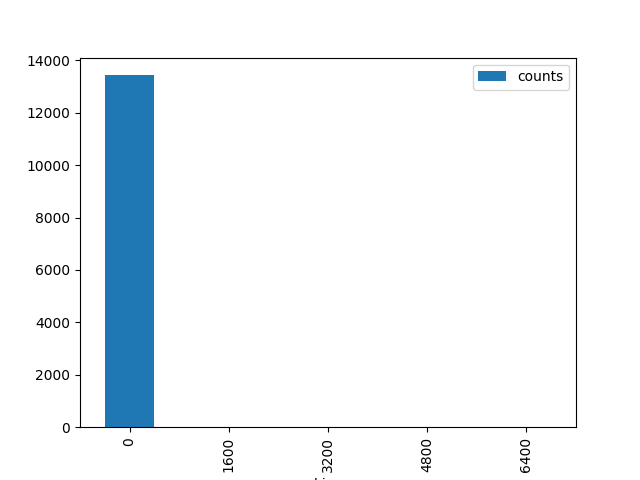

In [11]:
# Draw histogram of hours
#%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#IMPORTANT NOTE: If you have a large dataset use a smaller fraction otherwise you may crash your master node when convert Spark df to Pandas df
hist_HRS1 = hist_HRS1.sample(fraction=.70).toPandas()
hist_HRS1.set_index('bins'
            ).plot(kind='bar')
plt.show()
%matplot plt

Since there seemed to be something amiss with our hours column, it may be helpful to visualize it before we continue. The above code will be explained in more detail later when we finish our visualizations.

A histogram of hours shows that this column is not normally distributed and still needs some preprocessing. We will redraw the diagram after we have cleaned our data to see if it is fixed.

## Duplicate Analysis

In [12]:
# do we have any rows that are duplicated?
# This will check record counts vs distinct records to see if there are duplicates
gaming_df.count(), gaming_df.distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(13464, 13464)

There appears to be no duplicated rows with id, so we will move onto looking for duplicates with id's removed.

In [13]:
# The count of rows, without id
no_ids = (
    gaming_df
    .select([col for col in gaming_df.columns if col != 'Id'])
)

no_ids.count(), no_ids.distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(13464, 13413)

There appears to be 51 duplicate rows -- we can view them to see how many times they come up.

In [14]:
# Check which rows are duplicated without id
(
    gaming_df
    .groupby([col for col in gaming_df.columns if col != 'Id'])
    .count()
    .filter('count > 1')
    .show(5)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+--------------+----------+-------+----------+------+---+--------------------+--------------------+----------+---------+--------------------+-----+-----+------+-----+
|                GADE|Hours|      earnings|   whyplay|streams|Narcissism|Gender|Age|                Work|              Degree|Birthplace|Residence|           Playstyle|GAD_T|SWL_T|SPIN_T|count|
+--------------------+-----+--------------+----------+-------+----------+------+---+--------------------+--------------------+----------+---------+--------------------+-----+-----+------+-----+
|  Somewhat difficult|   16|I play for fun| improving|      6|         2|  Male| 20|Student at colleg...|High school diplo...|Bangladesh|      USA|        Singleplayer|    5|   26|    34|    2|
|Not difficult at all|   15|I play for fun| improving|     10|         2|  Male| 19|Student at colleg...|High school diplo...|       USA|      USA|Multiplayer - onl...|    0|   19|     3|    2|
|  Somewhat difficult|   30|I 

This may be caused by duplicate survey entries by the same person and we will remove them for our analysis.

In [15]:
# Remove the duplicated record(s)
id_removed = gaming_df.dropDuplicates(
    subset = [col for col in gaming_df.columns if col != 'Id']
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
# count of rows
id_removed.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

13413

There are 13413 records remaining after dropping duplicates.

In [17]:
# This code will check for duplicated id's
import pyspark.sql.functions as fn

id_removed.agg(
      fn.count('Id').alias('CountOfIDs')
    , fn.countDistinct('Id').alias('CountOfDistinctIDs')
).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+------------------+
|CountOfIDs|CountOfDistinctIDs|
+----------+------------------+
|     13413|             13413|
+----------+------------------+

No duplicated id's were found and at this step we are finished with our duplicate analysis.

## Missing Values

In [18]:
# Examine if there are any rows with missing values
id_removed.rdd.map(
           lambda row: (
                 row['Id']
               , sum([c == None for c in row])
           )
        )\
        .filter(lambda el: el[1] >= 1)\
        .count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1419

This means that there are 1419 records with atleast one missing value.

In [19]:
# Count the number of missing values in each row
(
    spark.createDataFrame(
        id_removed.rdd.map(
           lambda row: (
                 row['Id']
               , sum([c == None for c in row])
           )
        )
        .filter(lambda el: el[1] >= 1)
        .collect()
        ,['Id', 'CountMissing']
    )
    .orderBy('CountMissing', ascending=False)
    .show()
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+------------+
|   Id|CountMissing|
+-----+------------+
| 8651|           4|
|11495|           3|
| 4336|           3|
| 8756|           3|
|10105|           3|
| 6337|           3|
| 4502|           2|
|11414|           2|
| 5232|           2|
|  170|           2|
|11054|           2|
|  308|           2|
| 3307|           2|
| 2350|           2|
| 2742|           2|
| 5428|           2|
|  100|           2|
| 1319|           2|
| 6449|           2|
| 1159|           2|
+-----+------------+
only showing top 20 rows

There is only one record with more than 3 missing values -- id: 8651 with 4 missing values. 

In [20]:
# View the row with the most missing values
(
    id_removed
    .where('Id == 8651')
    .show()
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+------------------+-----+--------------+---------+-------+----------+------+---+----+--------------------+----------+---------+--------------------+-----+-----+------+
|  Id|              GADE|Hours|      earnings|  whyplay|streams|Narcissism|Gender|Age|Work|              Degree|Birthplace|Residence|           Playstyle|GAD_T|SWL_T|SPIN_T|
+----+------------------+-----+--------------+---------+-------+----------+------+---+----+--------------------+----------+---------+--------------------+-----+-----+------+
|8651|Somewhat difficult|   30|I play for fun|improving|   null|      null|  Male| 20|null|High school diplo...|    Russia|   Russia|Multiplayer - onl...|    0|   27|  null|
+----+------------------+-----+--------------+---------+-------+----------+------+---+----+--------------------+----------+---------+--------------------+-----+-----+------+

With 4 missing values, only 25 percent of the data is missing. This record will still prove useful after we finish with our missing values analysis, so we will keep it for now.

In [21]:
# Count percentage of missing values in each column
for k, v in sorted(
    id_removed.agg(*[
               (1 - (fn.count(c) / fn.count('*')))
                    .alias(c + '_miss')
               for c in id_removed.columns
           ])
        .collect()[0]
        .asDict()
        .items()
    , key=lambda el: el[1]
    , reverse=True
):
    print(k, v)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SPIN_T_miss 0.04831133974502344
GADE_miss 0.04823678520837993
streams_miss 0.007455453664355516
Work_miss 0.002833072392455116
Hours_miss 0.002236636099306688
Narcissism_miss 0.001714754342801772
Id_miss 0.0
earnings_miss 0.0
whyplay_miss 0.0
Gender_miss 0.0
Age_miss 0.0
Degree_miss 0.0
Birthplace_miss 0.0
Residence_miss 0.0
Playstyle_miss 0.0
GAD_T_miss 0.0
SWL_T_miss 0.0

There seems to be some inconsistencies in this method, so instead we will just view count of null values per column.

In [22]:
# Count of null values per column
from pyspark.sql.functions import col,isnan,when,count
null_columns = id_removed.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == 'NA' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in id_removed.columns])
null_columns.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+----+-----+--------+-------+-------+----------+------+---+----+------+----------+---------+---------+-----+-----+------+
| Id|GADE|Hours|earnings|whyplay|streams|Narcissism|Gender|Age|Work|Degree|Birthplace|Residence|Playstyle|GAD_T|SWL_T|SPIN_T|
+---+----+-----+--------+-------+-------+----------+------+---+----+------+----------+---------+---------+-----+-----+------+
|  0| 647|   30|       0|      1|    100|        23|     0|  0|  38|  1571|         0|        0|        0|    0|    0|   648|
+---+----+-----+--------+-------+-------+----------+------+---+----+------+----------+---------+---------+-----+-----+------+

With 13413 records, the highest percentage of null values in a column is Degree at 1571/13413 = 8.5 percent which is very low considering out dataset. We will keep this column as it can still prove useful after replacing missing values.

In [23]:
# Calculate mean of columns in dataset
means_df  = id_removed.select(*[fn.mean(c).alias(c) for c in features])
means_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+------------------+-----------------+------------------+-----------------+------------------+-----------------+
|            Hours|           streams|       Narcissism|               Age|            GAD_T|             SWL_T|           SPIN_T|
+-----------------+------------------+-----------------+------------------+-----------------+------------------+-----------------+
|22.26563550773369|11.236761060617441|2.027781926811053|20.932155371654364|5.212405874897487|19.784761052710056|19.86478652565609|
+-----------------+------------------+-----------------+------------------+-----------------+------------------+-----------------+

In [24]:
# Calculate mean of columns with missing values
means = (
    id_removed
    .agg(
          fn.mean(
              fn.col('Hours') 
          ).alias('Hours')
        , fn.mean(
            fn.col('streams')
        ).alias('streams')
        , fn.mean(
            fn.col('SPIN_T')
        ).alias('SPIN_T')
    )
).toPandas().to_dict('records')[0]

means

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{'Hours': 22.26563550773369, 'streams': 11.236761060617441, 'SPIN_T': 19.86478652565609}

Calculated means dictionary is consistent with the means of our features (numerical columns). 

In [25]:
# Replace missing values with mean
imputed = (
    id_removed
    .fillna(means)
)

imputed.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+--------------------+-----+--------------------+----------+-------+----------+------+---+--------------------+--------------------+-----------+-----------+--------------------+-----+-----+------+
|  Id|                GADE|Hours|            earnings|   whyplay|streams|Narcissism|Gender|Age|                Work|              Degree| Birthplace|  Residence|           Playstyle|GAD_T|SWL_T|SPIN_T|
+----+--------------------+-----+--------------------+----------+-------+----------+------+---+--------------------+--------------------+-----------+-----------+--------------------+-----+-----+------+
|2151|  Somewhat difficult|   45|I play mostly for...| improving|     20|         2|  Male| 18|   Student at school|                None|      Syria|        USA|Multiplayer - onl...|    1|   31|    15|
|2660|Not difficult at all|   20|      I play for fun|having fun|      5|         1|  Male| 18|Student at colleg...|High school diplo...|Netherlands|Netherlands|Multiplayer - onl...|    1|   2

We have now filled the necessary numerical columns with mean values of their respective columns. This concludes preprocessing for missing numbers.

## Outlier Detection

In [26]:
# We will run the following to determine what values are outliers using a method called approxQuantile
# q0 will be .0015 and q1 will be .9985 for standard deviation values
quantiles = [0.0015, 0.9985]

cut_off_points = []

#The third parameter, set to 0.05, is relative target precision to achieve (>= 0).
#If set to zero, the exact quantiles are computed, which could be very expensive. 
for feature in features:
    quants = imputed.approxQuantile(feature, quantiles, 0.0)
    print(feature, quants)
    cut_off_points.append((feature, [
        quants[0],
        quants[1],
    ]))

cut_off_points = dict(cut_off_points)

outliers = imputed.select(*['id'] + [
       (
           (imputed[f] < cut_off_points[f][0]) |
           (imputed[f] > cut_off_points[f][1])
       ).alias(f + '_o') for f in features
  ])
outliers.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Hours [1.0, 100.0]
streams [0.0, 84.0]
Narcissism [1.0, 5.0]
Age [18.0, 40.0]
GAD_T [0.0, 21.0]
SWL_T [5.0, 35.0]
SPIN_T [0.0, 66.0]
+----+-------+---------+------------+-----+-------+-------+--------+
|  id|Hours_o|streams_o|Narcissism_o|Age_o|GAD_T_o|SWL_T_o|SPIN_T_o|
+----+-------+---------+------------+-----+-------+-------+--------+
|2151|  false|    false|       false|false|  false|  false|   false|
|2660|  false|    false|       false|false|  false|  false|   false|
|3859|  false|    false|       false|false|  false|  false|   false|
|5723|  false|    false|       false|false|  false|  false|   false|
|6283|  false|    false|       false|false|  false|  false|   false|
+----+-------+---------+------------+-----+-------+-------+--------+
only showing top 5 rows

By using the quantiles of -3 and +3 standard deviations (.15 percent and 99.85 percent) we were able to run outlier detection on our dataset. Now that we have a dictionary of our outliers, it's time to filter them out.

In [27]:
# Show the rows containing outliers determined by method above
with_outliers_flag = imputed.join(outliers, on='Id')

(
    with_outliers_flag
    .filter('Hours_o OR streams_o OR Narcissism_o OR Age_o OR GAD_T_o OR SWL_T_o OR SPIN_T_o')
    .select(features)
    .show(10)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+-------+----------+---+-----+-----+------+
|Hours|streams|Narcissism|Age|GAD_T|SWL_T|SPIN_T|
+-----+-------+----------+---+-----+-----+------+
|   20|      0|         1| 49|    0|   19|     7|
|    0|      0|         4| 32|    8|   17|    31|
|    7|      5|         1| 19|   21|    5|    68|
|   20|     10|         3| 42|   13|   22|     0|
|   40|     20|         5| 19|   21|    5|    68|
|    5|      0|         4| 50|    0|   29|     7|
|  110|     11|         3| 18|    5|   13|    34|
|    8|      2|         1| 41|    8|   16|    33|
|    5|      5|         2| 18|   18|   12|    67|
|   90|     90|         1| 32|    0|   31|     8|
+-----+-------+----------+---+-----+-----+------+
only showing top 10 rows

The above dataset shows a sample of our outliers. You can see that some were excluded because of values like 0 hours played in a week (most gamers will have played for at least a few hours). 

In [28]:
# Filter outliers
no_outliers = (
    with_outliers_flag
    .filter('!(Hours_o OR streams_o OR Narcissism_o OR Age_o OR GAD_T_o OR SWL_T_o OR SPIN_T_o)')
    .select(imputed.columns)
)
no_outliers.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+--------------------+-----+--------------------+----------+-------+----------+------+---+--------------------+--------------------+-----------+-----------+--------------------+-----+-----+------+
|  Id|                GADE|Hours|            earnings|   whyplay|streams|Narcissism|Gender|Age|                Work|              Degree| Birthplace|  Residence|           Playstyle|GAD_T|SWL_T|SPIN_T|
+----+--------------------+-----+--------------------+----------+-------+----------+------+---+--------------------+--------------------+-----------+-----------+--------------------+-----+-----+------+
|2151|  Somewhat difficult|   45|I play mostly for...| improving|     20|         2|  Male| 18|   Student at school|                None|      Syria|        USA|Multiplayer - onl...|    1|   31|    15|
|2660|Not difficult at all|   20|      I play for fun|having fun|      5|         1|  Male| 18|Student at colleg...|High school diplo...|Netherlands|Netherlands|Multiplayer - onl...|    1|   2

The above code filtered out our outliers and now we can begin with descriptive statistics and visualization.

## Descriptive Statistics and Correlation

In [29]:
#describe numeric features
descriptive_stats = no_outliers.describe(features)
descriptive_stats.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+
|summary|             Hours|           streams|        Narcissism|               Age|            GAD_T|            SWL_T|            SPIN_T|
+-------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+
|  count|             13316|             13316|             13316|             13316|            13316|            13316|             13316|
|   mean|21.541604085310905|10.416416341243616|2.0257584860318416|20.903724842294984|5.199909882847702|19.79197957344548|19.757284469810752|
| stddev|13.350420132419409| 9.798595052019003|1.0590583408054162| 3.171651743794477|4.693359775002196|7.214485488069295|13.026555226707462|
|    min|                 1|                 0|                 1|                18|                0|                5|                 0|
|    max|    

A simple descriptive statistics shows that everything is looking better and no longer are standard deviation values higher than means. Descriptive statistics is a good way of describing the distribution of your data -- the count, mean, standard deviation, min, and max. Without any visuals, we can still get a good sense of our data. 

In [30]:
#create correlations table
n_features = len(features)

corr = []

for i in range(0, n_features):
    temp = [None] * i

    for j in range(i, n_features):
        temp.append(no_outliers.corr(features[i], features[j]))
    corr.append([features[i]] + temp)

correlations = spark.createDataFrame(corr, ['Column'] + features)

correlations.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    Column|Hours|            streams|          Narcissism|                 Age|               GAD_T|               SWL_T|              SPIN_T|
+----------+-----+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|     Hours|  1.0|0.13555972013882575| 0.05907406084779445|-0.09125767122878367| 0.09334131737312543|-0.13406787826377756|  0.0954954960948859|
|   streams| null|                1.0|0.029637869679591037|0.017858496711443458| 0.06919664022349958| -0.0688039608000826| 0.07563512350445188|
|Narcissism| null|               null|                 1.0|-0.03722732667280536| 0.07789688094996974|-0.01274547447186...|-0.00742954141877...|
|       Age| null|               null|                null|                 1.0|-0.04018460992047...|0.001094023105705...|-0.10343800705

By calculating correlations, we can detect any colinearity between our variables. Our variables should be independent of eachother or they might not be able to accurately and independently predict the value of our dependent variable. This will decrease their statistical significance, and we should avoid that at all costs. Fortunately, the above output shows that no one variable is highly correlated with any other.

## Visualization

In [31]:
# Generate bins and count of each bin
histogram_HRS = (
    no_outliers
    .select('Hours')
    .rdd
    .flatMap(lambda record: record)
    .histogram(5)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
#.histogram() generates two arrays: 
#1) list of bin bounds, 
#2) count of elements in corresponding bin
for i in histogram_HRS:
    print(i)
    
histogram_HRS

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[1.0, 20.8, 40.6, 60.400000000000006, 80.2, 100]
[8234, 4181, 701, 165, 35]
([1.0, 20.8, 40.6, 60.400000000000006, 80.2, 100], [8234, 4181, 701, 165, 35])

This shows us how our generated bins and count of bins are created -- a tuple of lists (cut-off points and frequencies).

In [33]:
#symbol * unpacks histogram_MPG and passes the two compoonents to zip as parameters
#zip(*histogram_HRS) = zip(histogram_HRS[0], histogram_HRS[1])
sorted(zip(*histogram_HRS))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[(1.0, 8234), (20.8, 4181), (40.6, 701), (60.400000000000006, 165), (80.2, 35)]

By zipping the two, the tuples have been unpacked and are now associated with eachother (bin and freqeuncy). Now that we have shown how this process is carried, we can create histograms for our columns. 

In [34]:
%%spark -o hist_HRS 
#The above Spark magic exports histogram to local node running the notebook
#So that we can use the local object to draw a histogram
import pandas as pd
hist_HRS =  spark.createDataFrame(
    list(zip(*histogram_HRS)), 
    ['bins', 'counts'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

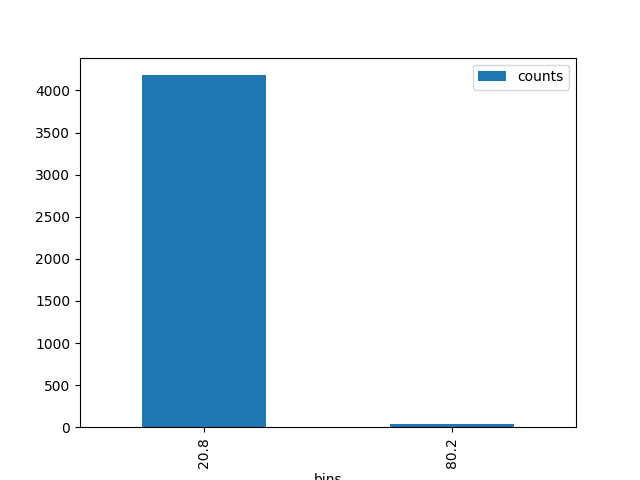

In [35]:
#draw histogram
#%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#IMPORTANT NOTE: If you have a large dataset use a smaller fraction otherwise you may crash your master node when convert Spark df to Pandas df
hist_HRS = hist_HRS.sample(fraction=.70).toPandas()
hist_HRS.set_index('bins'
            ).plot(kind='bar')
plt.show()
%matplot plt

The histogram for Hours shows that a huge proportion of hours played is under the 20.8 hour mark -- around 3 hours per day. Notice how it is much different than the first time we drew our hours histogram; the data is a lot cleaner after preprocessing.

In [36]:
#generate bins and counts for age
histogram_AGE = (
    no_outliers
    .select('Age')
    .rdd
    .flatMap(lambda record: record)
    .histogram(5)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [37]:
%%spark -o hist_AGE 
#The above Spark magic exports histogram to local node running the notebook
#So that we can use the local object to draw a histogram
import pandas as pd
hist_AGE =  spark.createDataFrame(
    list(zip(*histogram_AGE)), 
    ['bins', 'counts'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

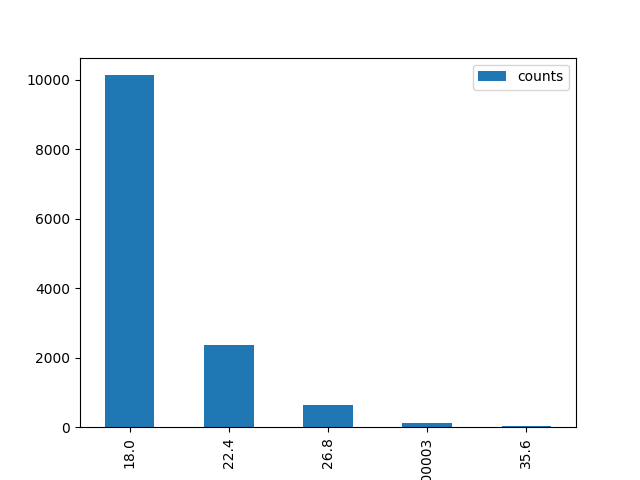

In [38]:
#draw histogram
#%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#IMPORTANT NOTE: If you have a large dataset use a smaller fraction otherwise you may crash your master node when convert Spark df to Pandas df
hist_AGE = hist_AGE.sample(fraction=.70).toPandas()
hist_AGE.set_index('bins'
            ).plot(kind='bar')
plt.show()
%matplot plt

Histogram of age. An incredible amount of our dataset is in their 20s, which is something to take note of when looking at statistics for mental illness.

In [39]:
# generate histogram for gad7
histogram_GAD = (
    no_outliers
    .select('GAD_T')
    .rdd
    .flatMap(lambda record: record)
    .histogram(5)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [40]:
%%spark -o hist_GAD 
#The above Spark magic exports histogram to local node running the notebook
#So that we can use the local object to draw a histogram
import pandas as pd
hist_GAD =  spark.createDataFrame(
    list(zip(*histogram_GAD)), 
    ['bins', 'counts'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

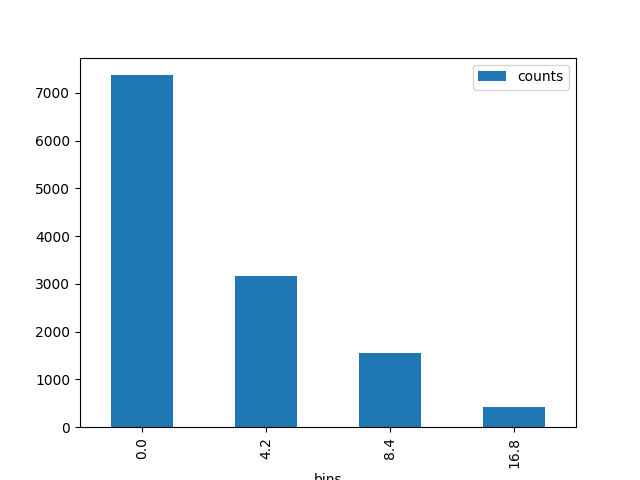

In [41]:
# draw histogram
#%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#IMPORTANT NOTE: If you have a large dataset use a smaller fraction otherwise you may crash your master node when convert Spark df to Pandas df
hist_GAD = hist_GAD.sample(fraction=.75).toPandas()
hist_GAD.set_index('bins'
            ).plot(kind='bar')
plt.show()
%matplot plt

Histogram for GAD7 personality questionnaire. It's a relief to see how many of records show lower scores on this test (the lower the score the lower the anxiety severity). 

In [42]:
# generate histogram for SWL
histogram_SWL = (
    no_outliers
    .select('SWL_T')
    .rdd
    .flatMap(lambda record: record)
    .histogram(5)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [43]:
%%spark -o hist_SWL 
#The above Spark magic exports histogram to local node running the notebook
#So that we can use the local object to draw a histogram
import pandas as pd
hist_SWL =  spark.createDataFrame(
    list(zip(*histogram_SWL)), 
    ['bins', 'counts'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

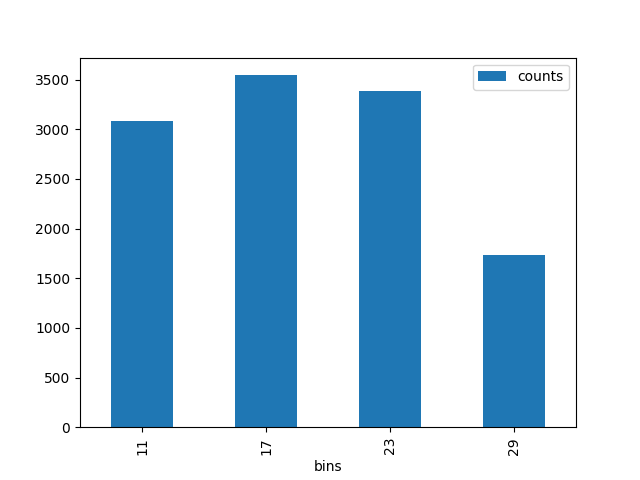

In [44]:
# draw histogram
#%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#IMPORTANT NOTE: If you have a large dataset use a smaller fraction otherwise you may crash your master node when convert Spark df to Pandas df
hist_SWL = hist_SWL.sample(fraction=.75).toPandas()
hist_SWL.set_index('bins'
            ).plot(kind='bar')
plt.show()
%matplot plt

The Satisfaction With Life Scale -- the higher the score the more satisfied you are with where you are in life. The data for SWL seems to be much more normally distributed than other columns.

In [45]:
# generate histogram for SPIN
histogram_SPIN = (
    no_outliers
    .select('SPIN_T')
    .rdd
    .flatMap(lambda record: record)
    .histogram(5)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [46]:
%%spark -o hist_SPIN 
#The above Spark magic exports histogram to local node running the notebook
#So that we can use the local object to draw a histogram
import pandas as pd
hist_SPIN =  spark.createDataFrame(
    list(zip(*histogram_SPIN)), 
    ['bins', 'counts'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

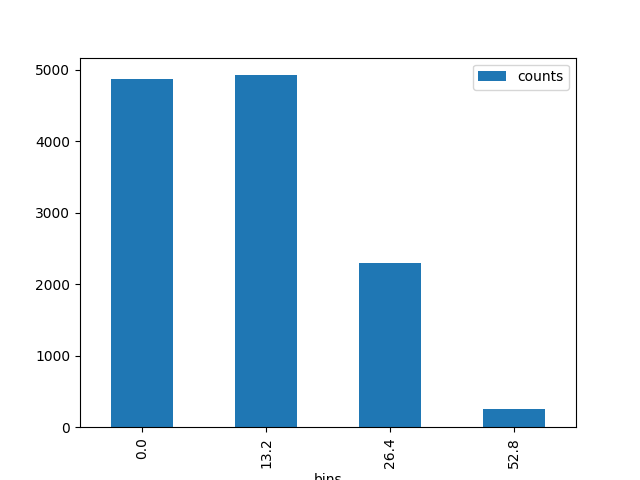

In [47]:
# draw histogram
#%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#IMPORTANT NOTE: If you have a large dataset use a smaller fraction otherwise you may crash your master node when convert Spark df to Pandas df
hist_SPIN = hist_SPIN.sample(fraction=.75).toPandas()
hist_SPIN.set_index('bins'
            ).plot(kind='bar')
plt.show()
%matplot plt

The Social Phobia Inventory. Our records show that most gamers scored under 26.4 (mild anxiety according to SPIN scale).

In [48]:
%%spark -o scatter
#spark magic moves dataframe to local
#By default it gets a sample of 2500 but you can change it
scatter = (
    no_outliers
    .select('Hours', 'GAD_T')
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

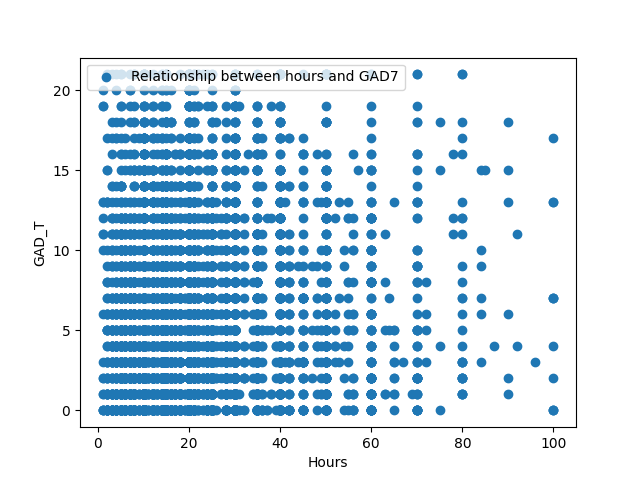

In [49]:
# draw scatter plot
#%matplotlib inline
import matplotlib.pyplot as plt

#Note: If you have a large dataset use a smaller fraction otherwise you may crash your master node when convert Spark df to Pandas df
scatter = scatter.sample(fraction=.75).toPandas()
plt.clf()
plt.scatter( list(scatter['Hours'])
         , list(scatter['GAD_T']), 
            label="Relationship between hours and GAD7")
plt.xlabel("Hours")
plt.ylabel("GAD_T")
plt.legend(loc='upper left')
plt.show()
%matplot plt

The relationship between hours and GAD7 scores looks randomly distributed, so we can infer there is no significant relationship between the two variables.

In [50]:
%%spark -o scatter
#spark magic moves dataframe to local
#By default it gets a sample of 2500 but you can change it
scatter = (
    no_outliers
    .select('Hours', 'SWL_T')
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

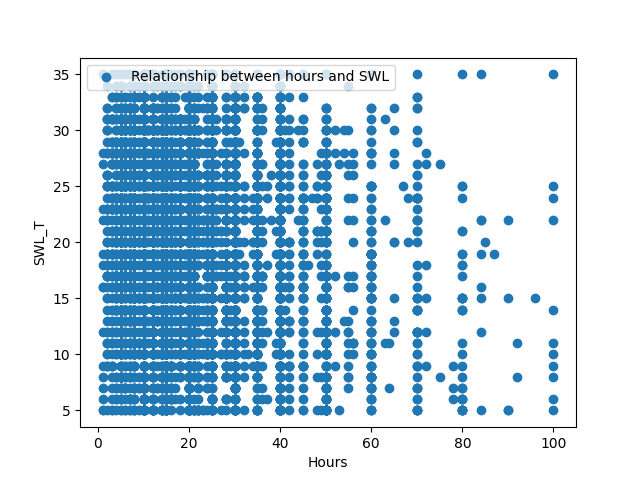

In [51]:
# draw scatter plot
#%matplotlib inline
import matplotlib.pyplot as plt

#Note: If you have a large dataset use a smaller fraction otherwise you may crash your master node when convert Spark df to Pandas df
scatter = scatter.sample(fraction=.75).toPandas()
plt.clf()
plt.scatter( list(scatter['Hours'])
         , list(scatter['SWL_T']), 
            label="Relationship between hours and SWL")
plt.xlabel("Hours")
plt.ylabel("SWL_T")
plt.legend(loc='upper left')
plt.show()
%matplot plt

The relationship between hours and SWL scores looks a bit more negatively related, but not enough to say it is significant.

In [52]:
%%spark -o scatter
#spark magic moves dataframe to local
#By default it gets a sample of 2500 but you can change it
scatter = (
    no_outliers
    .select('Hours', 'SPIN_T')
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

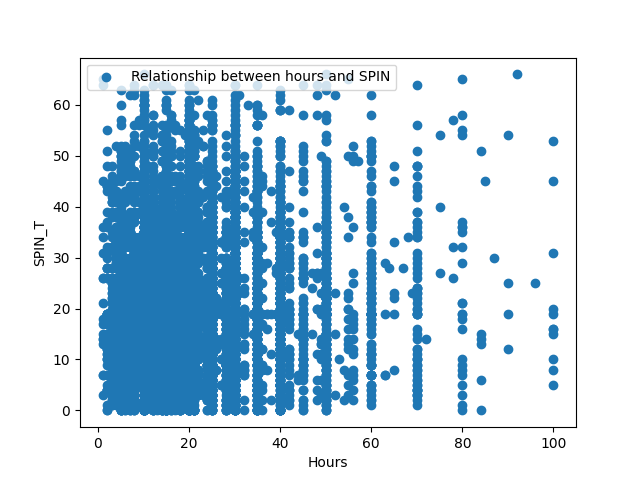

In [53]:
# draw scatter plot
#%matplotlib inline
import matplotlib.pyplot as plt

#Note: If you have a large dataset use a smaller fraction otherwise you may crash your master node when convert Spark df to Pandas df
scatter = scatter.sample(fraction=.75).toPandas()
plt.clf()
plt.scatter( list(scatter['Hours'])
         , list(scatter['SPIN_T']), 
            label="Relationship between hours and SPIN")
plt.xlabel("Hours")
plt.ylabel("SPIN_T")
plt.legend(loc='upper left')
plt.show()
%matplot plt

According to this scatterplot, the relationship between hours and SPIN is more significant than the others -- from this we can assume that the less hours someone plays, the lower the degree of social anxiety. However, there are still a large amount of people with high anxiety levels under the 20 hour per week mark. 

# Milestone 3: Modeling

We will begin by installing the necessary libraries

In [54]:
import pyspark.sql.functions as f
import pyspark.ml.feature as feat
import numpy as np

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [55]:
#install S3 package needed for saving correlation output to S3
sc.install_pypi_package('s3fs')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Running setup.py bdist_wheel for aiobotocore: started
  Running setup.py bdist_wheel for aiobotocore: finished with status 'done'
  Stored in directory: /var/lib/livy/.cache/pip/wheels/b5/ed/0c/11a73368b58c96ef1bdce956adb4e806aaa2c648e8a2332fd2
Successfully built aiobotocore

## Data Transformation and Normalization 

In [56]:
no_outliers.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- Id: integer (nullable = true)
 |-- GADE: string (nullable = true)
 |-- Hours: integer (nullable = true)
 |-- earnings: string (nullable = true)
 |-- whyplay: string (nullable = true)
 |-- streams: integer (nullable = true)
 |-- Narcissism: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Work: string (nullable = true)
 |-- Degree: string (nullable = true)
 |-- Birthplace: string (nullable = true)
 |-- Residence: string (nullable = true)
 |-- Playstyle: string (nullable = true)
 |-- GAD_T: integer (nullable = true)
 |-- SWL_T: integer (nullable = true)
 |-- SPIN_T: integer (nullable = true)

In [57]:
# Drop unnecessary columns
gaming = no_outliers.drop('earnings','whyplay','Birthplace', 'Residence','Playstyle')
gaming.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- Id: integer (nullable = true)
 |-- GADE: string (nullable = true)
 |-- Hours: integer (nullable = true)
 |-- streams: integer (nullable = true)
 |-- Narcissism: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Work: string (nullable = true)
 |-- Degree: string (nullable = true)
 |-- GAD_T: integer (nullable = true)
 |-- SWL_T: integer (nullable = true)
 |-- SPIN_T: integer (nullable = true)

In this step we drop the unneccessary columns for our model; most of these columns are only useful for visualization ( birthplace, residence, etc.). Columns such as earnings, whyplay, and playstyle are too specific to include in our analysis -- the survey allowed a free response for these variables and don't prove useful in a real model.

In [58]:
# Create dummies of our categorical variables
columns=["Id", "Hours", "streams", "Narcissism", "Age", "GAD_T", "SWL_T", "SPIN_T"]
categorical_columns=["GADE", "Gender", "Work", "Degree"]
#categorical_columns=["TYPE"]
expressions=[]
for column in categorical_columns:
    expression = gaming.select(column).distinct().rdd.flatMap(lambda x: x).collect()
    types_expr = [f.when(f.col(column) == ty, 1).otherwise(0).alias("e_{}_{}".format(column, ty)) for ty in expression]
    expressions += types_expr
df = gaming.select(*columns, *expressions)
df.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+-----+-------+----------+---+-----+-----+------+-----------+--------------------------+-------------------------+---------------------------+---------------------+--------------+-------------+---------------+--------------------------------------+-----------+------------------------+--------------------------------+---------------+-------------------------------+-------------------------------------------+---------------------------------+-------------+--------------------------------------------+
|  Id|Hours|streams|Narcissism|Age|GAD_T|SWL_T|SPIN_T|e_GADE_None|e_GADE_Extremely difficult|e_GADE_Somewhat difficult|e_GADE_Not difficult at all|e_GADE_Very difficult|e_Gender_Other|e_Gender_Male|e_Gender_Female|e_Work_Student at college / university|e_Work_None|e_Work_Student at school|e_Work_Unemployed / between jobs|e_Work_Employed|e_Degree_Master�(or equivalent)|e_Degree_Ph.D., Psy. D., MD (or equivalent)|e_Degree_Bachelor�(or equivalent)|e_Degree_None|e_Degree_High school diploma

A few of our variables were categorical, so before we proceed with the next steps we must create dummies for them. Dummies allow us to cast these variables into 0's and 1's and will act as boolean values for our modeling.

In [59]:
#Check to see if they were all cast to integer
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- Id: integer (nullable = true)
 |-- Hours: integer (nullable = true)
 |-- streams: integer (nullable = true)
 |-- Narcissism: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- GAD_T: integer (nullable = true)
 |-- SWL_T: integer (nullable = true)
 |-- SPIN_T: integer (nullable = true)
 |-- e_GADE_None: integer (nullable = false)
 |-- e_GADE_Extremely difficult: integer (nullable = false)
 |-- e_GADE_Somewhat difficult: integer (nullable = false)
 |-- e_GADE_Not difficult at all: integer (nullable = false)
 |-- e_GADE_Very difficult: integer (nullable = false)
 |-- e_Gender_Other: integer (nullable = false)
 |-- e_Gender_Male: integer (nullable = false)
 |-- e_Gender_Female: integer (nullable = false)
 |-- e_Work_Student at college / university: integer (nullable = false)
 |-- e_Work_None: integer (nullable = false)
 |-- e_Work_Student at school: integer (nullable = false)
 |-- e_Work_Unemployed / between jobs: integer (nullable = false)
 |-- e_Work_Employed: i

In [60]:
# check to see that all records are still there
df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

13316

In [61]:
# Period in column is causing an error
df = df.withColumnRenamed('e_Degree_Ph.D., Psy. D., MD (or equivalent)','e_Degree_PhD')
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- Id: integer (nullable = true)
 |-- Hours: integer (nullable = true)
 |-- streams: integer (nullable = true)
 |-- Narcissism: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- GAD_T: integer (nullable = true)
 |-- SWL_T: integer (nullable = true)
 |-- SPIN_T: integer (nullable = true)
 |-- e_GADE_None: integer (nullable = false)
 |-- e_GADE_Extremely difficult: integer (nullable = false)
 |-- e_GADE_Somewhat difficult: integer (nullable = false)
 |-- e_GADE_Not difficult at all: integer (nullable = false)
 |-- e_GADE_Very difficult: integer (nullable = false)
 |-- e_Gender_Other: integer (nullable = false)
 |-- e_Gender_Male: integer (nullable = false)
 |-- e_Gender_Female: integer (nullable = false)
 |-- e_Work_Student at college / university: integer (nullable = false)
 |-- e_Work_None: integer (nullable = false)
 |-- e_Work_Student at school: integer (nullable = false)
 |-- e_Work_Unemployed / between jobs: integer (nullable = false)
 |-- e_Work_Employed: i

In [62]:
# Some data cleaning
df = df.select([f.col(col).alias(col.replace(' ', '_')) for col in df.columns])
df = df.withColumnRenamed('e_Degree_Master�(or_equivalent)','e_Degree_Master')
df = df.withColumnRenamed('e_Degree_Bachelor�(or_equivalent)','e_Degree_Bachelor')
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- Id: integer (nullable = true)
 |-- Hours: integer (nullable = true)
 |-- streams: integer (nullable = true)
 |-- Narcissism: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- GAD_T: integer (nullable = true)
 |-- SWL_T: integer (nullable = true)
 |-- SPIN_T: integer (nullable = true)
 |-- e_GADE_None: integer (nullable = false)
 |-- e_GADE_Extremely_difficult: integer (nullable = false)
 |-- e_GADE_Somewhat_difficult: integer (nullable = false)
 |-- e_GADE_Not_difficult_at_all: integer (nullable = false)
 |-- e_GADE_Very_difficult: integer (nullable = false)
 |-- e_Gender_Other: integer (nullable = false)
 |-- e_Gender_Male: integer (nullable = false)
 |-- e_Gender_Female: integer (nullable = false)
 |-- e_Work_Student_at_college_/_university: integer (nullable = false)
 |-- e_Work_None: integer (nullable = false)
 |-- e_Work_Student_at_school: integer (nullable = false)
 |-- e_Work_Unemployed_/_between_jobs: integer (nullable = false)
 |-- e_Work_Employed: i

In [63]:
#Vectorize all columns
vectorAssembler = (
    feat.VectorAssembler(
        inputCols=df.columns, 
        outputCol='feat'
    )
)

#fit PCA to the vector with 5 components
pca = (
    feat.PCA(
        k=5
        , inputCol=vectorAssembler.getOutputCol()
        , outputCol='pca_feat'
    )
)

#transform the data using PCA
#original dataset contains 26 columns
#the output shows one vectorized record as well as
#the 5 feature output of the record from PCA
(
    pca
    .fit(vectorAssembler.transform(df))
    .transform(vectorAssembler.transform(df))
    .select('feat','pca_feat')
    .take(1)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(feat=SparseVector(26, {0: 2151.0, 1: 45.0, 2: 20.0, 3: 2.0, 4: 18.0, 5: 1.0, 6: 31.0, 7: 15.0, 10: 1.0, 14: 1.0, 18: 1.0, 24: 1.0}), pca_feat=DenseVector([-2150.9981, -37.7177, -26.2537, 10.5225, 35.6101]))]

Vector Assembler will create a vector of all columns and PCA will create a principal component vector of 5 components. In order to proceed with our modeling, we'll be using vectorassembly often to keep all our features in one vector.

## Correlations and Interpretations

In [64]:
# Create correlation matrix of variables
#%%spark -o corr
import pyspark.ml.stat as st
import numpy as np
import pandas as pd

features_and_label = feat.VectorAssembler(
    inputCols=df.columns
    , outputCol='features'
)

corr = st.Correlation.corr(
    features_and_label.transform(df), 
    'features', 
    'pearson'
)

print(str(corr.collect()[0][0]))
corr_pd = corr.toPandas()
output_np = np.array(corr_pd.iloc[0, 0].values).reshape(
    (corr_pd.iloc[0, 0].numRows, corr_pd.iloc[0, 0].numCols))

#Change the following path to a path in your own S3 bucket
spark.createDataFrame(pd.DataFrame(output_np)).repartition(1).write.format('csv').option('header',True
                ).mode('overwrite').option('sep',',').save('s3://cis4670-sergiofigueroa/Spark/corr2')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DenseMatrix([[ 1.00000000e+00, -2.56458070e-03, -2.15230724e-02,
               2.30439346e-04, -4.96925279e-02, -1.33038552e-03,
              -1.79796762e-03,  6.04069129e-03,             nan,
              -8.77642281e-03, -2.80147066e-04,  3.82557717e-03,
               1.57150694e-02, -5.79280406e-03, -2.08467419e-02,
               2.30264693e-02,  6.70519409e-04,             nan,
               1.26783127e-02, -5.12844040e-03, -1.07050575e-02,
              -3.97716466e-02, -1.64457950e-03, -1.85279868e-02,
               1.07216847e-03,  3.12427663e-02],
             [-2.56458070e-03,  1.00000000e+00,  1.35559720e-01,
               5.90740608e-02, -9.12576712e-02,  9.33413174e-02,
              -1.34067878e-01,  9.54954961e-02,             nan,
               7.53027200e-02, -4.72953464e-03, -4.68069186e-02,
               4.93823890e-02,  3.19224331e-02,  3.86681522e-02,
              -4.83238811e-02, -5.83551092e-02,             nan,
               2.64281228e-02,  1.4281681

## Linear Regression

In [65]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [66]:
import pyspark.ml.regression as rg
cols = [c for c in df.columns if c != 'GAD_T']
# let's predict gad_t  using the rest of features
gadt = df.drop('GAD_T')
vectorAssembler = feat.VectorAssembler(
    inputCols=gadt.columns[:]
    , outputCol='features')

#cast elevation to float and use it as label
gadt_dataset = (
    vectorAssembler
    .transform(df)
    .withColumn(
        'label'
        , f.col('GAD_T').cast('float'))
    .select('label', 'features')
)
#create a linear regression object and fit to dataset    
lr_obj = rg.LinearRegression(
    maxIter=10
    , regParam=0.01
    , elasticNetParam=1.00)
lr_model = lr_obj.fit(gadt_dataset)

#examine model coefficients
lr_model.coefficients

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DenseVector([-0.0, 0.0042, 0.0022, 0.2085, -0.0164, -0.0961, 0.0713, 0.0, 10.867, 4.7141, 1.8536, 8.4198, 0.734, -0.4899, 0.3574, -0.0074, 0.0, 0.0163, -0.2324, -0.0289, 0.1341, 0.0, 0.1165, -0.1123, -0.0017])

In [67]:
summary = lr_model.summary

print(
    summary.r2
    , summary.rootMeanSquaredError
    , summary.meanAbsoluteError
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.4966819582720954 3.329574893431127 2.476767113500111

A simple linear regression model shows an r2 score of .49, rmse of 3.33, and mae of 2.48. This means it is still not entirely accurate in predicting the GAD_T score using all features.

In [68]:
from pyspark.ml import Pipeline

#we are doing the same thing as the previous cell, now using a pipeline
vectorAssembler = feat.VectorAssembler(
    inputCols=gadt.columns
    , outputCol='features')

#Generalized Linear model (GLM) allows for running regression 
#on non-normal data. identity link function is used when we don't need to
#transform dependent varaible. Other link functions, such as log or logit,
#transform the dependent variable
lr_obj = rg.GeneralizedLinearRegression(
    labelCol='GAD_T'
    , maxIter=10
    , regParam=0.01
    , link='identity'
    , linkPredictionCol="p"
)

#create a pipeline of the 2 stages (vectorization, regression)
pip = Pipeline(stages=[vectorAssembler, lr_obj])

#run the pipeline
(
    pip
    .fit(df)
    .transform(df)
    .select('GAD_T', 'prediction')
    .show(5)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----+------------------+
|GAD_T|        prediction|
+-----+------------------+
|    1| 4.974011693991472|
|    1|  1.94754965975699|
|    2|2.5185806441107075|
|   13|11.064956263031142|
|    3|2.6983878577013485|
+-----+------------------+
only showing top 5 rows

A pipeline will allow us to sequence our models and organize our dataframes a little better.

In [69]:
%%spark -o transformed_df -m sample -n 3000
#the above magic exports a random sample of 3000 records from transformed_df to local
#the default number of records is 2500

transformed_df = df.select('GAD_T')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [70]:
%%local
transformed_df.count()

GAD_T    1319
dtype: int64

array([[<AxesSubplot:title={'center':'GAD_T'}>]], dtype=object)

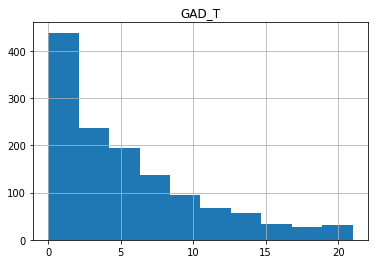

In [71]:
%%local
#draw a histogram of GAD_T
transformed_df.hist()

GAD_T scores are not normally distributed, so if we have to normalize it to better fit our models we will. However, we should avoid overfitting.

## Selecting the most predictable features

In [72]:
#exclude the label CoverType from features vector
vectorAssembler = feat.VectorAssembler(
    inputCols=gadt.columns
    , outputCol='features'
)

#select top 10 features, store in a new column named selected
selector = feat.ChiSqSelector(
    labelCol='GAD_T'
    , numTopFeatures=10
    , outputCol='selected')

pipeline_sel = Pipeline(stages=[vectorAssembler, selector])

model = (
    pipeline_sel
    .fit(df)
    .transform(df)
)

#print selected features
model.schema['selected'].metadata

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{'ml_attr': {'attrs': {'numeric': [{'idx': 0, 'name': 'Hours'}, {'idx': 1, 'name': 'Narcissism'}, {'idx': 2, 'name': 'SWL_T'}, {'idx': 3, 'name': 'SPIN_T'}, {'idx': 4, 'name': 'e_GADE_Extremely_difficult'}, {'idx': 5, 'name': 'e_GADE_Somewhat_difficult'}, {'idx': 6, 'name': 'e_GADE_Not_difficult_at_all'}, {'idx': 7, 'name': 'e_GADE_Very_difficult'}, {'idx': 8, 'name': 'e_Gender_Male'}, {'idx': 9, 'name': 'e_Gender_Female'}]}, 'num_attrs': 10}}

For the GAD7 (Generalized Anxiety Disorder) assessment, the number one most predictable feature is Hours. This was expected, but now we have a bit more data that can prove useful in our models.

## Gradient Boosted Trees Regression

In [73]:
# Create a pipeline for gbt
import pyspark.ml.evaluation as ev
gbt_obj = rg.GBTRegressor(
    labelCol='GAD_T'
    , minInstancesPerNode=10
    , minInfoGain=0.1
)

pip = Pipeline(stages=[vectorAssembler, gbt_obj])

results = (
    pip
    .fit(df)
    .transform(df)
    .select('GAD_T', 'prediction')
)

evaluator = ev.RegressionEvaluator(labelCol='GAD_T')
evaluator.evaluate(results, {evaluator.metricName: 'r2'})

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.4754709645690611

According to this model, gradient boosted trees results in a lower r2 score than our simple linear regression from earlier (.47 vs .49). 

In [87]:
vectorAssembler = feat.VectorAssembler(
    inputCols=gadt.columns
    , outputCol='features')

#Generalized Linear model (GLM) allows for running regression 
#on non-normal data. identity link function is used when we don't need to
#transform dependent varaible. Other link functions, such as log or logit,
#transform the dependent variable
lr_obj = rg.GeneralizedLinearRegression(
    labelCol='GAD_T'
    , maxIter=10
    , regParam=0.25
    , link='identity'
    , linkPredictionCol="p"
)

#create a pipeline of the 2 stages (vectorization, regression)
pip = Pipeline(stages=[vectorAssembler, lr_obj])

#run the pipeline
results = (
    pip
    .fit(df)
    .transform(df)
    .select('GAD_T', 'prediction')
)

evaluator = ev.RegressionEvaluator(labelCol='GAD_T')
print(evaluator.evaluate(results, {evaluator.metricName: 'r2'}))
print(evaluator.evaluate(results, {evaluator.metricName: 'rmse'}))
print(evaluator.evaluate(results, {evaluator.metricName: 'mae'}))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-75:
Traceback (most recent call last):
  File "/emr/notebook-env/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/emr/notebook-env/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/emr/notebook-env/lib/python3.7/site-packages/awseditorssparkmonitoringwidget-1.0-py3.7.egg/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 513



0.48943221610298104
3.353468590462133
2.521656559627194

These are our 3 metrics from earlier, implemented in a much neater method thanks to pipeline.

## Tuning Hyperparameters

In [83]:
# Tune hyperparameters such as regParam and elasticNetParam to find the best combination
import pyspark.ml.tuning as tune
df_train, df_test = (
    df
    .randomSplit([0.7, 0.3], seed=666)
)

vectorAssembler = feat.VectorAssembler(
    inputCols=gadt.columns
    , outputCol='features')

selector = feat.ChiSqSelector(
    labelCol='GAD_T'
    , numTopFeatures=5
    , outputCol='selected')

lr_obj = rg.LinearRegression(
    labelCol='GAD_T'
    ,maxIter=10
    , regParam=0.01
    , elasticNetParam=1.00)
    
lr_grid = (
    tune.ParamGridBuilder()
    #try 2 values for regParam
    .addGrid(lr_obj.regParam
            , [0.25, 0.5, 0.75]
        )
     #try 2 values for elasticNetParam
    .addGrid(lr_obj.elasticNetParam
            , [1.0, 0.5, .25]
        )
    .build()
)

lr_ev = ev.RegressionEvaluator(labelCol='GAD_T')

train_v = tune.TrainValidationSplit(
    estimator=lr_obj
    , estimatorParamMaps=lr_grid
    , evaluator= lr_ev
    #, parallelism=4
)

pipeline = Pipeline(stages=[vectorAssembler, selector])
data_trans = pipeline.fit(df_train)


lrReg_modelTrainV = (
    train_v
    .fit(data_trans.transform(df_train)))

data_trans_test = data_trans.transform(df_test)

results = lrReg_modelTrainV.transform(data_trans_test)

print(lr_ev.evaluate(results, {lr_ev.metricName: 'r2'}))
print(lr_ev.evaluate(results, {lr_ev.metricName: 'rmse'}))
print(lr_ev.evaluate(results, {lr_ev.metricName: 'mae'}))
print('Best params, regParam: %s, elasticNetParam: %s' 
      %(lrReg_modelTrainV.bestModel._java_obj.getRegParam(),
       lrReg_modelTrainV.bestModel._java_obj.getElasticNetParam()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.4899174062676058
3.336647555994225
2.540737643450431
Best params, regParam: 0.25, elasticNetParam: 0.25

In [85]:
vectorAssembler = feat.VectorAssembler(
    inputCols=gadt.columns
    , outputCol='features')
#create a linear regression object and fit to dataset    
lr_obj = rg.LinearRegression(
    labelCol='GAD_T'
    ,maxIter=10
    , regParam=0.25
    , elasticNetParam=0.25)

#create a pipeline of the 2 stages (vectorization, regression)
pip = Pipeline(stages=[vectorAssembler, lr_obj])

#run the pipeline
results = (
    pip
    .fit(df)
    .transform(df)
    .select('GAD_T', 'prediction')
)

evaluator = ev.RegressionEvaluator(labelCol='GAD_T')
print(evaluator.evaluate(results, {evaluator.metricName: 'r2'}))
print(evaluator.evaluate(results, {evaluator.metricName: 'rmse'}))
print(evaluator.evaluate(results, {evaluator.metricName: 'mae'}))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-73:
Traceback (most recent call last):
  File "/emr/notebook-env/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/emr/notebook-env/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/emr/notebook-env/lib/python3.7/site-packages/awseditorssparkmonitoringwidget-1.0-py3.7.egg/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 487



0.48410247930100647
3.3709263147507196
2.544967869328313